In [37]:
import pandas_datareader as pdr
import datetime
import numpy as np
import pandas as pd

In [ ]:
#reference - https://www.quandl.com/tools/python
import quandl

In [63]:
# Generally for fetching data, they expect us to register after which a unique API key is provided for each user.
# This is the same as what we have to do for getting twitter data.
quandl.ApiConfig.api_key = "HYs_ygeP49iq5pzoQVh6"

In [64]:
today = datetime.datetime.now().date()
past_today=today - datetime.timedelta(days=365)
stock = 'AXISBANK'
#d=pdr.get_data_google(stock,end=str(today),start=str(past_today))
symbol = 'NSE/AXISBANK'  # or 'AAPL.US'

In [65]:
#df = quandl.get(symbol, api_key='HYs_ygeP49iq5pzoQVh6')

In [50]:
#rename some of the columns to reflect the same with names compatable with common literature
df.rename(columns={'Last':'Close','Close':'Adj_Close'},inplace=True)
#Below indicator  measures the change in the close price with respect to the change in yesterday’s range. We are trying to check if there is any correlation between today’s close with respect to the price volatility yesterday
df['dif'] = (df.Close-df.Close.shift(1)/df.High.shift(1)-df.Low.shift(1))
#created a column called ‘sec_dif’, this is the second order difference of change in close prices.
df['sec_dif'] = (df.dif-df.dif.shift(1)/df.High.shift(1)-df.Low.shift(1))
#diff_v column is used to measure the change in the range today compared to that of a day before.
df['diff_v'] = (df.High-df.Low)/(df.High.shift(1)-df.Low.shift(1))
#Return is the change in closing price as compared to today's closing price
df['Return'] = (df.Adj_Close-df.Adj_Close.shift(1))/df.Adj_Close
#Signal to identify whether we should trade or not based on returns
df['Signal'] = np.where(df.Return>0,1,-1)
df['Yesterday_return'] = df.Return.shift(1)
df.dropna(inplace=True)
#df[['Return']]


In [51]:
df1 = df.copy()
df1 = df1.reset_index()

In [52]:
df.Signal.unique()

array([ 1, -1], dtype=int64)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

scl = StandardScaler()
X=scl.fit_transform(df1[['dif','sec_dif','diff_v','Yesterday_return']])
X.size
#X=scl.fit(df[['dif','sec_dif','diff_v','Yesterday_return']])
y=df1.Signal

In [54]:

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)



In [55]:
from sklearn import metrics
# summarize the fit of the model
expectedTest = y_test
predictedTest = model.predict(X_test)
predictedTrain = model.predict(X_train)
#print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))

NameError: name 'model' is not defined

In [62]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)
predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)

print('\033[1m' + 'Training Data Accuracy')
print('\033[0m')
train_accuracy = pd.crosstab(y_train, predicted_train, rownames=['Actual Target'], colnames=['Predicted Target'])
print(train_accuracy)
print('\033[1m' + 'Testing Data Accuracy')

print('\033[0m')
test_accuracy = pd.crosstab(y_test, predicted_test, rownames=['Actual Target'], colnames=['Predicted Target'])
print(test_accuracy)



Training Data Accuracy

Predicted Target   -1    1
Actual Target             
-1                837   75
 1                 67  848
Testing Data Accuracy

Predicted Target   -1    1
Actual Target             
-1                334   56
 1                 60  334


In [18]:
# You need to install graphviz package for this. Do this by either using pip install <graphviz> or conda install if you are using anaconda.
# Graphviz installation is not good enough to get the picture out. You need to append graphviz in the path for ipython.

import sys,os,os.path

In [25]:
print(sys.path)

['', 'C:\\Users\\shahi\\Anaconda3\\python36.zip', 'C:\\Users\\shahi\\Anaconda3\\DLLs', 'C:\\Users\\shahi\\Anaconda3\\lib', 'C:\\Users\\shahi\\Anaconda3', 'C:\\Users\\shahi\\Anaconda3\\lib\\site-packages', 'C:\\Users\\shahi\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg', 'C:\\Users\\shahi\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\shahi\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\shahi\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\shahi\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\shahi\\.ipython', 'C:\\Users\\shahi\\Anaconda3\\Library\\bin\\graphviz']


In [24]:
sys.path.append("C:\\Users\\shahi\\Anaconda3\\Library\\bin\\graphviz")

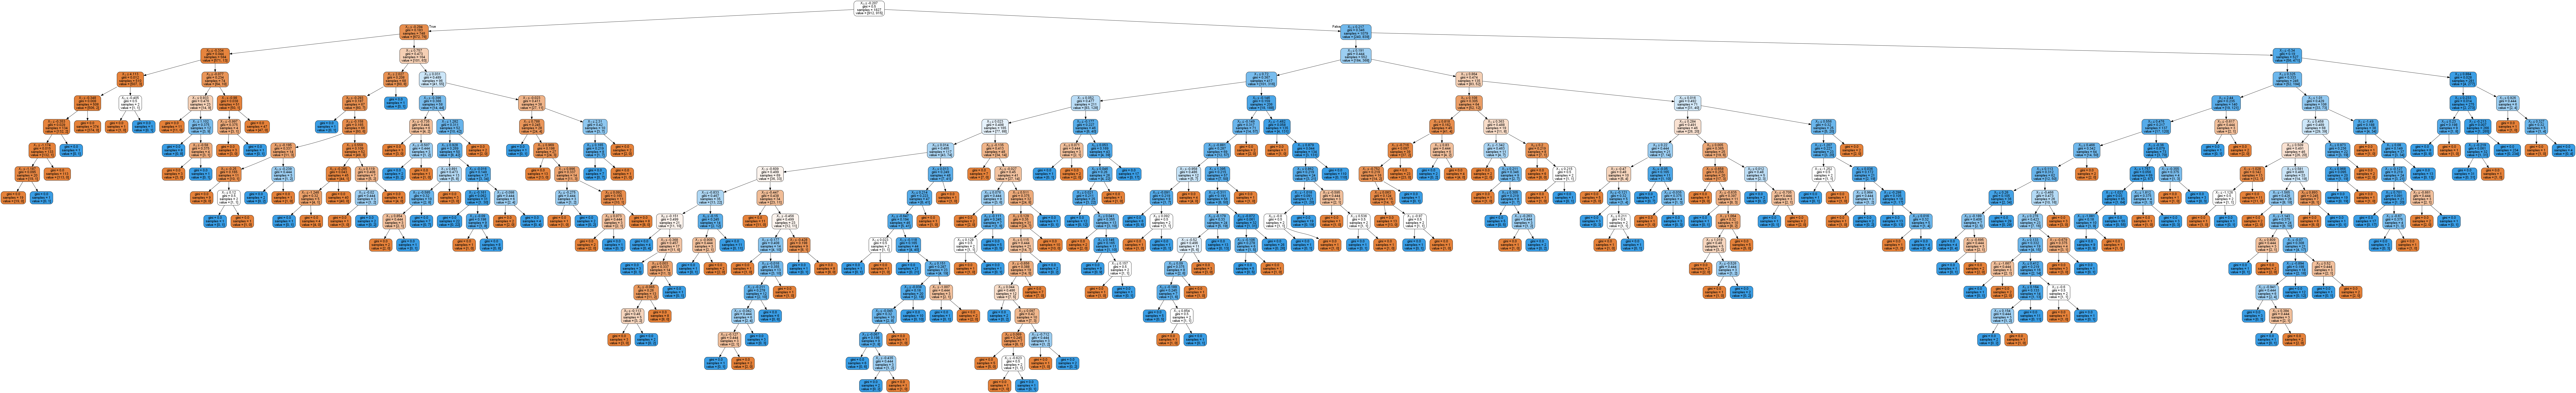

In [57]:
# Picturize the classification tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())